In [1]:
# Let's get the importing out of the way.
# Numpy for calculations, matplotlib for plotting.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Make the matplotlib plots interactive
%matplotlib notebook

In [9]:
# Lattice vectors (3 vectors of length 3)
a1 = np.array([0.5, 0.5, 0])
a2 = np.array([0.5, 0, 0.5])
a3 = np.array([0, 0.5, 0.5])
# Array of basis vectors
basis = np.array([[0,0,0]])

# We need the number of basis-vectors. 
# If there is only 1 basis vector, then len(np.shape(basis)) == 1
# otherwise the length is 2, and the first element is number of basis vectors
length_basis = np.shape(basis)
if len(length_basis) == 1:
    N_basis = 1
elif len(length_basis) > 1:
    N_basis = length_basis[0]
    
# set the range of lattice vectors to be calculated
nx_max, ny_max, nz_max = 4, 4, 4
nx_min, ny_min, nz_min = -2, -2, -2
# Calculate the amount of atomic positions to be calculated
numAtoms = (nx_max + 1 - nx_min) * (ny_max + 1 - ny_min) * (nz_max + 1 - nz_min) * N_basis
# Make a zero array for all of the atomic positions
AtomicPositions = np.zeros((numAtoms, 3))

# Loop over all chosen linear combinations of basis vectors and plot each 
counter = 0
for nx in range(nx_min, nx_max + 1):
    for ny in range(ny_min, ny_max + 1):
        for nz in range(nz_min, nz_max + 1 ):
            lattice_position = nx * a1 + ny * a2 + nz * a3
            
            for n_atom in range(N_basis):
                AtomicPositions[counter,] = lattice_position + basis[n_atom,]
                counter += 1
                

In [10]:
# We need a way to hide points outside the limits
# The limits
x_min, y_min, z_min = 0, 0, 0
x_max, y_max, z_max = 1, 1, 1
atoms,dims = np.shape(AtomicPositions)
rows = []

# loop over all row ID's
for rowID in range(atoms):
    
    # if the atom is outside the limits, we append the row ID to a list
    row = AtomicPositions[rowID,]
    # (it's actually easier and prettier to check if they're inside)
    inside_x = x_min <= row[0] <= x_max
    inside_y = y_min <= row[1] <= y_max
    inside_z = z_min <= row[2] <= z_max
    inside = inside_x and inside_y and inside_z
    if not inside:
        rows.append(rowID)

# delete all rows (axis 0 of the array) that are outside the limits 
AtomicPositions = np.delete(AtomicPositions, rows, 0);

<IPython.core.display.Javascript object>


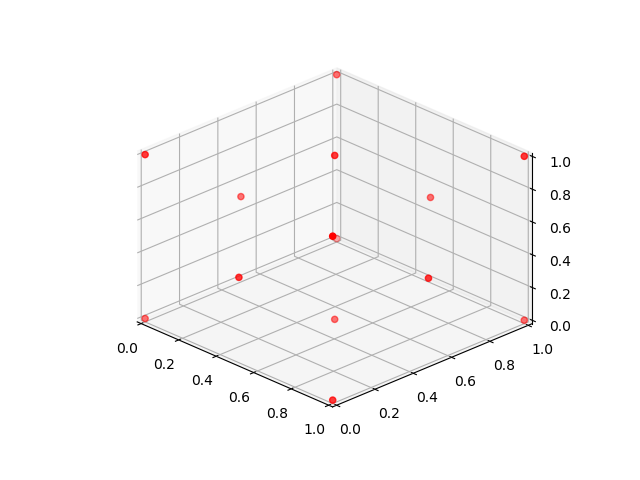

In [11]:
# Create the figure
fig = plt.figure()
ax = fig.gca(projection = "3d")

# Plot atoms. For now a single size and color
ax.scatter(AtomicPositions[:,0], AtomicPositions[:,1], AtomicPositions[:,2], c = 'r')
for 


# Set limits and orthographic projection, so we can see those beautiful hexagons
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])
ax.set_proj_type('ortho')